In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
v = pd.read_csv('data.csv')

In [3]:
v = v.drop('Unnamed: 0',axis = 1)

In [4]:
v = v[v.record < 833508]

In [5]:
v = v.set_index('record')

In [6]:
from scipy import stats

In [7]:
KSFDR = pd.DataFrame(columns = ['ks'])

In [8]:
goods = v[v['fraud_label'] == 0]
bads = v[v['fraud_label'] == 1]

In [9]:
i = 0
for column in list(v.columns):
    KSFDR.loc[i,'ks'] = stats.ks_2samp(goods[column],bads[column])[0]
    i = i+1

In [10]:
KSFDR.index = v.columns

In [11]:
KSFDR = KSFDR.reset_index()

In [12]:
KSFDR.sort_values('ks',ascending = False)

,index,ks
605,fraud_label,1
547,address_pastday,0.329781
561,address-zip5_pastday,0.328941
11,address_count30_date,0.328484
109,address-zip5_count30_date,0.327827
...,...,...
175,ssn-address-zip5_count0_date,0.00168458
280,name-ssn-homephone-dob_count0_date,0.00164877
273,name-ssn-homephone-dob-address-zip5_count0_date,0.00162807
189,ssn-homephone-zip5_count0_date,0.00162442


In [13]:
numbads = len(bads)

In [14]:
topRows = int(round(len(v)*0.03))
j = 0
for column in v.columns:
    if column != 'fraud_label':
        temp1 = v[[column,'fraud_label']].sort_values(column,ascending=False).head(topRows)
        temp2 = v[[column,'fraud_label']].sort_values(column,ascending=True).head(topRows)
        needed1 = temp1.loc[:,'fraud_label']
        needed2 = temp2.loc[:,'fraud_label']
        FDR1 = sum(needed1)/numbads
        FDR2 = sum(needed2)/numbads
        FDRate = np.maximum(FDR1,FDR2)
        KSFDR.loc[j, 'FDR'] = FDRate
        j = j +1
    else:
        KSFDR.loc[j, 'FDR'] = 1
        j = j+1

In [15]:
KSFDR['KS_rank'] = KSFDR['ks'].rank(axis = 0)
KSFDR['FDR_rank'] = KSFDR['FDR'].rank(axis = 0)
KSFDR['Average_rank'] = (KSFDR['KS_rank'] + KSFDR['FDR_rank'])/2

In [16]:
df=v.copy()

In [17]:
df=df[KSFDR.sort_values(['Average_rank']).tail(81)['index']]

In [18]:
df=df.drop(['fraud_label'],axis=1)

In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(df.to_numpy())
data=pd.DataFrame(data,columns=df.columns)

In [21]:
from sklearn.feature_selection import RFECV

In [29]:
import warnings
warnings.filterwarnings('ignore')
rfecv=RFECV(estimator=model,step=1,cv=3,verbose=1,n_jobs=1,scoring='roc_auc')
rfecv.fit(data,v['fraud_label'])

Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 fe

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.


RFECV(cv=3,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=1, scoring='roc_auc', step=1, verbose=1)

In [35]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x),rfecv.ranking_),data.columns)),columns = ['ranking', 'variable'])
var_selected.head(25)

,ranking,variable
0,1,address-homephone-zip5_count180_date
1,1,address-homephone-zip5_count7_date
2,1,address-homephone-zip5_pastday
3,1,address-homephone_count180_date
4,1,address-homephone_pastday
5,1,address-zip5_0_count180_count_ratio
6,1,address-zip5_0_count30_count_ratio
7,1,address-zip5_0_count7_count_ratio
8,1,address-zip5_count30_date
9,1,address-zip5_pastday


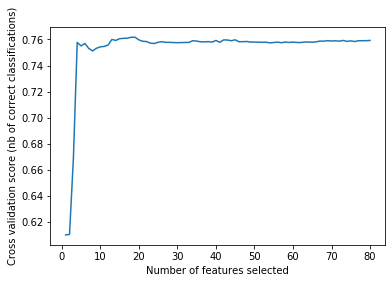

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score (nb of correct classifications)')
plt.savefig('score1.png')